In [16]:
import uscensus

# plotting dependencies, assumed at least to have matplotlib
from matplotlib import pyplot as plt
try:
    import contextily as ctx
except:
    pass

In [17]:
# collect all LODES jobs for 2020 by tract for Jefferson and Ouray counties in Colorado
# 1. downloads the LODES WAC file, which stores jobs by census block
# 2. filters the response to the census tracts within counties 08059 + 08091 (by FIPS geocode)
# 3. aggregates the count by sum and geocode id of rows to the tract level 
# 4. downloads the Colorado TIGER/Lines shapefile for census tracts in Colorado
# 5. combines the result
df = uscensus.run_wac_tiger(year=2020, geoids="08059,08091", wildcard='"census_tract"')

100%|██████████| 1/1 [00:01<00:00, 0.51it/s]442/1442 [00:00<00:00, 2747760.50it/s].00it/s]

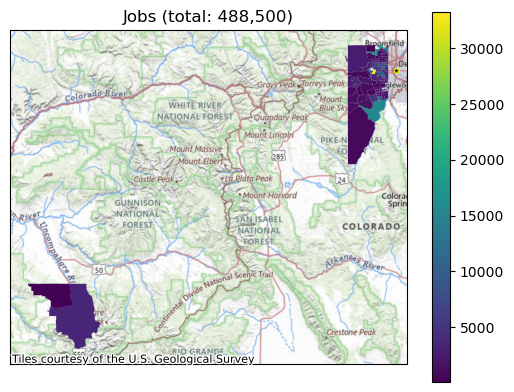

In [18]:
fig, ax = plt.subplots()
df.to_crs("EPSG:3857").plot("value", legend=True, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Jobs (total: {int(df.value.sum()):,})")
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)